# Heart Analysis Project

## Import libraries

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get Information about the dataset

In [91]:
df=pd.read_csv('Dataset/heart.csv')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [92]:
df.shape
print("Number of Rows",df.shape[0])
print("Number of Rows",df.shape[1])

Number of Rows 1025
Number of Rows 14


In [93]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Display last 5 Rows

In [95]:
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


## Find null values

In [96]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Find Duplicates and drop

In [97]:
print(df.duplicated().any())


True


In [98]:
df=df.drop_duplicates()

## Find new shape after dropping duplicates

In [99]:
df.shape
print("Number of Rows",df.shape[0])
print("Number of Rows",df.shape[1])

Number of Rows 302
Number of Rows 14


## Get overall infos

In [100]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Create a correlation matrix heatmap, spot where there is no correlation

In [205]:
def spot_correlation(value):
    color= 'red' if value==0 else 'white'
    return f'color :{color}'
style=df.style.applymap(spot_correlation)
style

C:\Users\redic\AppData\Local\Temp\ipykernel_12040\908688083.py:4: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  style=df.style.applymap(spot_correlation)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.000000,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.100000,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.600000,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.000000,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.900000,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.000000,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.400000,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.800000,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.800000,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.200000,1,2,2,0


<Axes: >

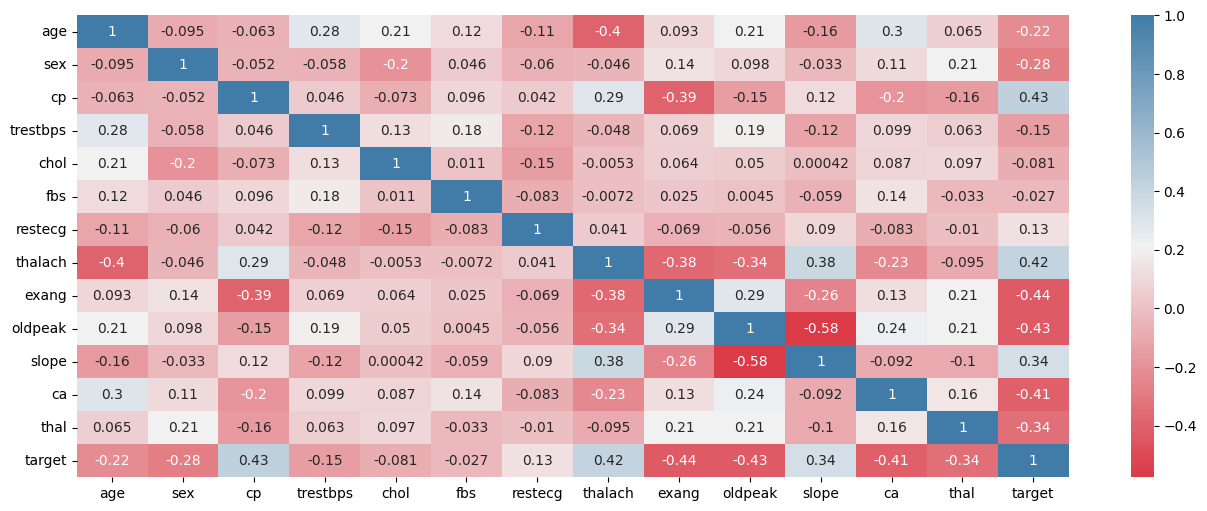

In [102]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot=True,cmap=sns.diverging_palette(10,240,n=240))

## How many people have a heart disease?

In [103]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [107]:
df['target'].value_counts()


target
1    164
0    138
Name: count, dtype: int64

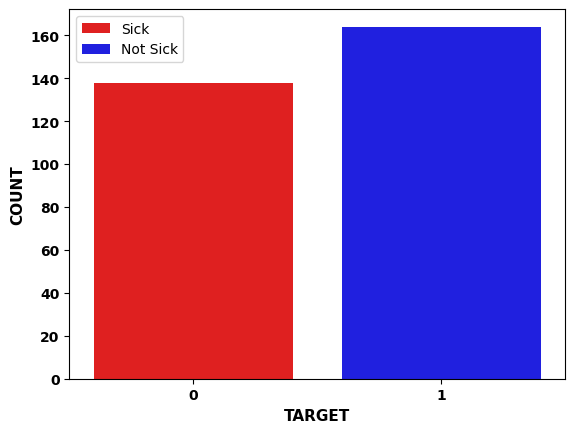

In [256]:
sns.countplot(x='target',data=df,palette=["red","blue"],hue='target')
plt.xlabel('TARGET',fontsize=11,fontweight='bold')
plt.ylabel('COUNT',fontsize=11,fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(labels=["Sick","Not Sick"])

## Which gets sick more

In [136]:
df['sex'].value_counts()  # 1 is for male , 0 for female

sex
1    206
0     96
Name: count, dtype: int64

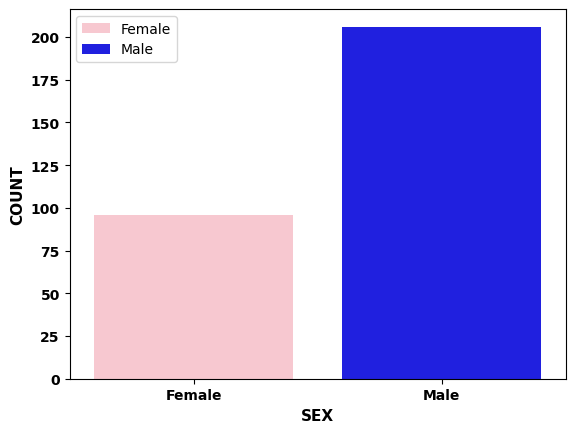

In [257]:
sns.countplot(x='sex',data=df,palette=['pink','blue'],hue='sex')
plt.xticks([0,1],['Female','Male'])
plt.xlabel("GENDER",fontsize=12)
plt.ylabel("COUNT",fontsize=12)
plt.legend(labels=["Female","Male"])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('SEX',fontsize=11,fontweight='bold')
plt.ylabel('COUNT',fontsize=11,fontweight='bold')
plt.show()

## TARGET AND GENDER DISTRIBUTION

In [168]:
df['sex'].value_counts()
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

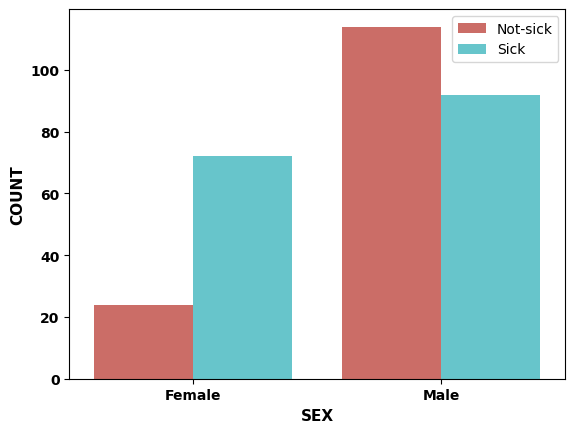

In [258]:
sns.countplot(x='sex',hue='target',data=df,palette="hls")
plt.legend(labels=['Not-sick','Sick'])
plt.xticks([0,1],["Female","Male"])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('SEX',fontsize=11,fontweight='bold')
plt.ylabel('COUNT',fontsize=11,fontweight='bold')
plt.show()
# MALES TEND TO GET SICK MORE

## CHECK AGE

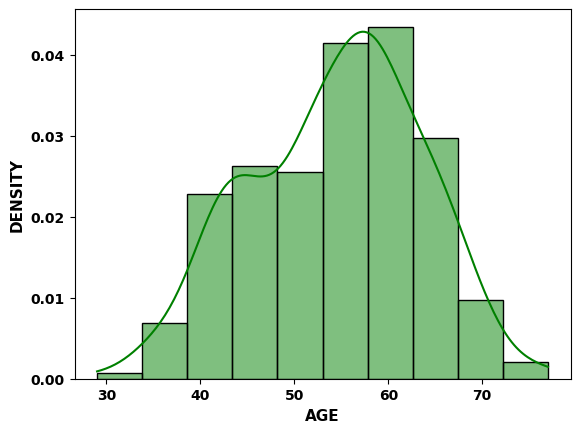

In [259]:
sns.histplot(df['age'],bins=10,stat="density",kde='True',color="green")
plt.xlabel('AGE',fontsize=11,fontweight='bold')
plt.ylabel('DENSITY',fontsize=11,fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

## TYPES OF CHEST PAIN

0 -> typical angina
1 -> atypical angina
2 -> non-anginal pain
3 -> asymptomatic 

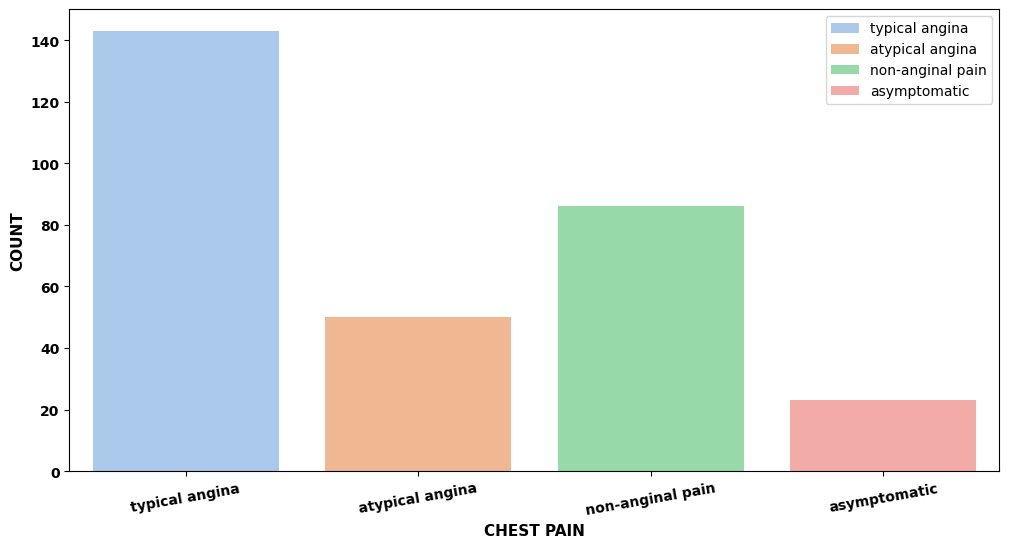

In [260]:
plt.figure(figsize=(12,6))
sns.countplot(x='cp',data=df,hue='cp',palette="pastel")
plt.xticks([0,1,2,3],['typical angina','atypical angina','non-anginal pain','asymptomatic' ])
plt.legend(labels=['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.xticks(rotation=10)
plt.xlabel('CHEST PAIN',fontsize=11,fontweight='bold')
plt.ylabel('COUNT',fontsize=11,fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

## DISTRIBUTION FOR CHEST PAIN

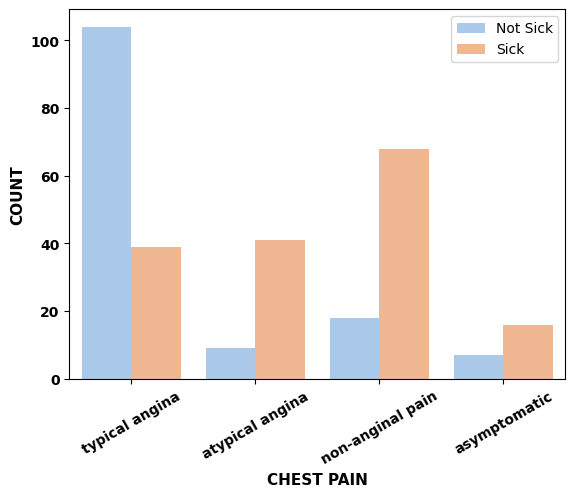

In [261]:
sns.countplot(x='cp',data=df,hue='target',palette='pastel')
plt.legend(labels=['Not Sick','Sick'])
plt.xticks([0,1,2,3],['typical angina','atypical angina','non-anginal pain','asymptomatic' ])
plt.xlabel('CHEST PAIN',fontsize=11,fontweight='bold')
plt.ylabel('COUNT',fontsize=11,fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xticks(rotation=30)
plt.show()

## Compare resting blood pressure per gender

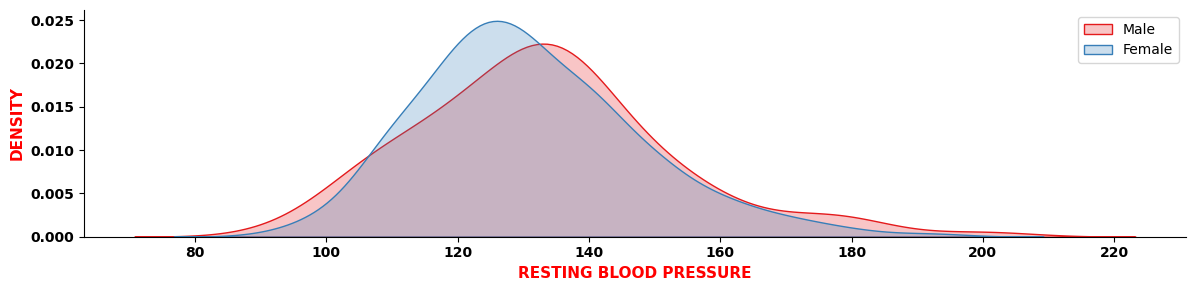

In [253]:
graph=sns.FacetGrid(df,hue='sex',aspect=4,palette='Set1')
graph.map(sns.kdeplot,'trestbps',fill=True)
plt.legend(labels=['Male','Female'])
plt.xlabel('RESTING BLOOD PRESSURE',fontsize=11,fontweight='bold',color="red")
plt.ylabel('DENSITY',fontsize=11,fontweight='bold',color="red")
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()
# WOMEN HAVE HIGHER RESTING Blood pressure

## SHOW CHOL DISTRIBUTION

In [275]:
df['chol_group'].value_counts()

chol_group
Group 2 (from 200 to 320)    232
Group 3 (high values)         70
Name: count, dtype: int64

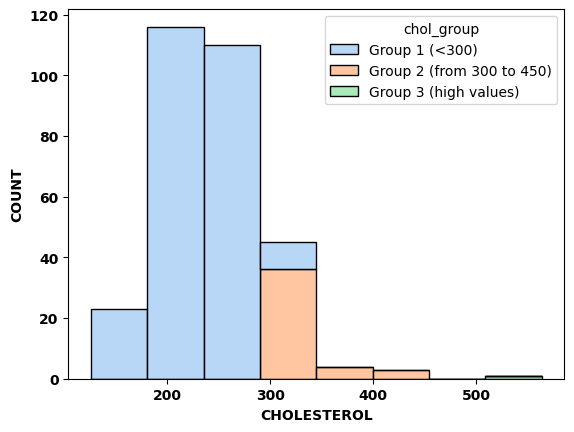

In [298]:
def group_cat(chol_value):
    if chol_value<300:
        return 'Group 1 (<300)'
    elif chol_value >= 300 and chol_value<=450:
        return 'Group 2 (from 300 to 450)'
    else:
        return 'Group 3 (high values)'

df['chol_group']=df['chol'].apply(group_cat)
sns.histplot(x='chol',data=df,palette="pastel",hue='chol_group',multiple='stack',bins=8)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("CHOLESTEROL",fontweight="bold")
plt.ylabel("COUNT",fontweight="bold")
plt.show()